In [10]:
import json
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statsmodels
import csv
import pickle

# Processing Data from PostGRES Output

Creating a single JSON file for each participant from PostGRES data that contains a single list of all participant data

In [11]:
fileprefix = "full_r_2" # pilot_[1,2,4]
datafolder = '../results/'
filepath = '{}/{}_results.json'.format(datafolder,fileprefix)


In [12]:
with open(filepath, 'r') as f:
    all_data = json.load(f)

In [13]:
part_data = {}

count = 0
for participant in all_data['values']:
    count+=1
    print(count, participant[2])
    try:
        part_object = json.loads(participant[17])
        # Update condition here by setting part_object["condition"]
        # print(part_object["condition"])
        # part_object["condition"] = 1
        part_object["Beginhit"] = participant[11]
        part_object["Beginexp"] = participant[12]
        part_object["Endhit"] = participant[13]
        part_object["psiturkStatus"] = participant[15]
        part_object["browser"] = participant[5]
        part_object["platform"] = participant[6]
        part_object["language"] = participant[7]
        
        if part_object["workerId"].startswith("debug"):
            continue

        part_data[part_object["workerId"]] = part_object
        with open('../results/{}_{}.json'.format(fileprefix, part_object['workerId']), 'w') as fw:
            json.dump(part_object, fw)
    except:
        print("Fail")
        continue;

1 debugB70WE
2 5b2a72f7c293b90001732b89
3 5e3421311ddb123e1de9e6ad
4 6129dca465e41b5ae1b262da
5 610a879e6500d1d653b3da54
6 63f787256fc87f0a297a849c
7 63d7a79e2606216262545e75
8 611e457faf653c7ba30ca2f6
9 6124e3f51271418b0da10d87
10 6123ea6c873f4f6d73a74029
11 615eb4359e91a19283b519cf
12 6137753896c9b6b5813a2432
13 5b4e2703995d4e0001093117
14 5eb64825c23fbf5300fb5bd9
15 611ba9bea0d5bd7db68678e7
16 616ed458582d2c3b50149493
17 5bf49e6c51d2d40001920719
18 5fc00a11268eb941e7d8b066
19 6130815ed54ea2aeb63c7eea
20 5ae2280338df95000145500c
21 6143032aae61cebf9451c6cd
22 645d3d0d4ba9fb55a0652314
23 645399862870885f462d4aff
24 6016bbe3a28c6014fd3236b8
25 60e867797bb5194a119f7d60
26 63d418c18b9d9b4daf0a4ae6
27 5ef0a7a320e4520009b3af18
28 60ec594ed83f53ef48680356
29 611e8f65d14fed0d245c6eb4
30 6026bdfaf5361f3d0273bb9c
31 5d430817d8e9610001825890
32 6151a560fca061c58676693e
33 5f033c50099f49505831941b
34 60f815535ea713f564c6ed61
35 5fdcda70e44df42e0c260fab
36 6113d1d02fbd58ed15b3c8e0
37 617678a35596

In [14]:
part_data.keys()


dict_keys(['5b2a72f7c293b90001732b89', '5e3421311ddb123e1de9e6ad', '6129dca465e41b5ae1b262da', '610a879e6500d1d653b3da54', '63f787256fc87f0a297a849c', '63d7a79e2606216262545e75', '611e457faf653c7ba30ca2f6', '6124e3f51271418b0da10d87', '6123ea6c873f4f6d73a74029', '615eb4359e91a19283b519cf', '6137753896c9b6b5813a2432', '5b4e2703995d4e0001093117', '5eb64825c23fbf5300fb5bd9', '611ba9bea0d5bd7db68678e7', '616ed458582d2c3b50149493', '5bf49e6c51d2d40001920719', '5fc00a11268eb941e7d8b066', '6130815ed54ea2aeb63c7eea', '5ae2280338df95000145500c', '6143032aae61cebf9451c6cd', '645d3d0d4ba9fb55a0652314', '645399862870885f462d4aff', '6016bbe3a28c6014fd3236b8', '60e867797bb5194a119f7d60', '63d418c18b9d9b4daf0a4ae6', '5ef0a7a320e4520009b3af18', '60ec594ed83f53ef48680356', '611e8f65d14fed0d245c6eb4', '6026bdfaf5361f3d0273bb9c', '5d430817d8e9610001825890', '6151a560fca061c58676693e', '5f033c50099f49505831941b', '60f815535ea713f564c6ed61', '5fdcda70e44df42e0c260fab', '6113d1d02fbd58ed15b3c8e0', '617678a3

In [15]:
len(part_data.keys())

116

# Reading Data from Already Created Participant Data Files

In [16]:
fileprefix = "full_r_2" # pilot_#, final
datafolder = '../results/'

all_part_files = [filename for filename in os.listdir(datafolder) if filename.startswith(fileprefix) and 'results' not in filename]
all_part_paths = [datafolder + filename for filename in all_part_files]

In [17]:
part_data = {}
for file in all_part_paths:
    with open(file, 'r') as f:
        participant = json.load(f)
        part_data[participant["workerId"]] = participant



In [18]:
len(part_data.keys())

116

In [19]:
print("\n".join(part_data.keys()))

614395b646280ec3c4ab1d49
6137753896c9b6b5813a2432
60f815535ea713f564c6ed61
616ed458582d2c3b50149493
5f9aeb04901ce62720fc6838
615fdd9674ec001e9d325841
60cd99f1d0df72833ad4346a
612bef062e4e035e081ba009
6113d1d02fbd58ed15b3c8e0
605ba57d2842d8291b4afd24
6090755b3aebf491674a5e86
60fa9b17c5f485add54e64c8
614dd477b69221b863e025af
5e674adf46fdb74c79935db0
5f033c50099f49505831941b
6016bbe3a28c6014fd3236b8
61335f0c0d6044240df555f8
60e867797bb5194a119f7d60
6026bdfaf5361f3d0273bb9c
613b789d93a4e9a50e6e2c0b
611d6078d33b376bfb58198f
5fc00a11268eb941e7d8b066
5c49d339b43d260001e4dbcb
61648e4f0d2212047ab36b27
617678a3559642b86549849d
60ec594ed83f53ef48680356
610a879e6500d1d653b3da54
6110bd8b78a9ce36185798ab
6483605a0d0e43c659c92801
5ece259aa4ded10009c65c73
611e457faf653c7ba30ca2f6
5e3421311ddb123e1de9e6ad
615eb4359e91a19283b519cf
615f4ddc420b1b75f246a4ec
5f78a12acd4a784585c83337
61504e85a1e23353a05dd8fa
6153554048e1825ac1946e84
5d5193ce23e3ae0001f5f262
6161b89b2318b608686deb14
5f003e622ec97b13f2764ec9


# Analyzing Trial Data

Create a list of objects, one for each participant's data

In [20]:
# List of participants who are excluded and the reason for exclusion

excluded_parts = []

In [21]:
part_stats_dicts = []
extract_max_trials = 40
for participant in part_data.values():
    try:
        beginhit = datetime.datetime.strptime(participant['Beginhit'], '%Y-%m-%d %H:%M:%S.%f')
    except TypeError:
        beginhit = None
    try:
        endhit = datetime.datetime.strptime(participant['Endhit'], '%Y-%m-%d %H:%M:%S.%f')
    except TypeError:
        endhit = None
    try:    
        beginexp = datetime.datetime.strptime(participant['Beginexp'], '%Y-%m-%d %H:%M:%S.%f')
    except TypeError:
        beginexp = None
    
    try:
        hitLength = (endhit-beginhit).seconds
    except TypeError:
        hitLength = None
    
    try:
        expLength = (endhit-beginexp).seconds
    except TypeError:
        expLength = None
        
    numPracTrials = 0
    trialLengths = []
    trialScores = []
    rewardsWithheld = []
    reached_max_trials = False
    effort = "-1"
    age = None
    gender = None
    colorblind = None
    print(participant['workerId'])
    try:
        firstTrialStamp = participant['data'][0]['dateTime']
        lastTrialStamp = participant['data'][-1]['dateTime']
    except:
        print("No data")
        continue
    if hitLength is None:
        hitLength = (lastTrialStamp - firstTrialStamp) / 1000
    if expLength is None:
        expLength = (lastTrialStamp - firstTrialStamp) / 1000
        
    mdp_timestamps = {
        "start" : 0,
        "end" : 0,
        "done": False
    }
    current_state = "stroop_1"
    last_trial = participant['data'][0]
    finishHITReached = False
    demographicsAvailable = False
    feedback = ""
    alreadyParticipated = ""
    comments = ""
    whatStrategy = ""
    clicksL1 = []
    firstLevelAns = {}
    clickStratsValid = True
    strategyImprove = ""
    difficult = ""
    num_correct_sequences = 0
    final_quiz_responses = None
    for idx, trial in enumerate(participant['data']):
        trial_type = trial['trialdata']['trial_type']
        try:
            trial_id = str(trial['trialdata']['trial_id'])
        except KeyError:
            trial_id = ""
        
        if participant['workerId'] == "5eb40f1f0d916d20d9db9144":
            print("{}\t{}\t{}".format(trial_type, trial_id, idx))
            
        if trial_id.startswith("mouselab_instructions_1") and not mdp_timestamps["done"]:
            mdp_timestamps["done"] = True
            mdp_timestamps["start"] = trial['dateTime']
        
        if "num_correct_sequences" in trial['trialdata']:
            num_correct_sequences = trial['trialdata']['num_correct_sequences']
        
        if trial_id.startswith("final_quiz"):
            mdp_timestamps["end"] = trial['dateTime']
            final_quiz_responses = trial['trialdata']['response']

        if trial_id.startswith("self_report_2"):
            firstLevelAns = trial['trialdata']['response']
        
        if trial_id.startswith("finish_fail"):
            feedback = trial['trialdata']['response']['Q0']
            age = trial['trialdata']['response']['Q1']
            gender = trial['trialdata']['response']['Q2']
            colorblind = trial['trialdata']['response']['Q3']
            comments = trial['trialdata']['response']['Q4']
            demographicsAvailable = True
            
        if trial_type == 'mouselab-mdp':
            if trial_id.startswith('practice'):
                numPracTrials += 1
            else:
                if extract_max_trials and len(trialScores) == extract_max_trials:
                    if not reached_max_trials:
                        reached_max_trials = True
                        print(f"!!! More than {extract_max_trials} trials found !!!")
                trialLengths.append(trial['trialdata']['trialTime'])
                
                trialScores.append(trial['trialdata']['score'])
                rewardsWithheld.append(trial['trialdata']['withholdReward'])
                clicks = trial['trialdata']['queries']['click']['state']['target']
                cL1 = len([c for c in clicks if int(c) in [1,12,23]])
                clicksL1.append(cL1)
        if trial_type == 'survey-html-form':
            
            if 'effort' in trial['trialdata']['response']:
                effort = int(trial['trialdata']['response']['effort'])
                age = trial['trialdata']['response']['age']
                gender = trial['trialdata']['response']['gender']
                colorblind = trial['trialdata']['response']['colorblind']
                demographicsAvailable = True
        
        elif trial_type == 'survey-text':
            if trial_id.startswith("self_report"):
                whatStrategy = trial['trialdata']['response']['Q0']
                strategyImprove = trial['trialdata']['response']['Q1']
                difficult = trial['trialdata']['response']['Q2']
            
            elif not trial_id.startswith("answer"):
                #print(trial['trialdata'])
                feedback = trial['trialdata']['response']['Q0']
                alreadyParticipated = trial['trialdata']['response']['Q1']
                comments = trial['trialdata']['response']['Q2']
        
        if trial_type == 'html-button-response':
            if "Finish HIT" in trial['trialdata']['stimulus']:
                finishHITReached = True
        last_trial = trial
    
    # Checking if click strategies are invalid
    if firstLevelAns:
        # Criteria 1: clicks made on first level nodes on more than 10% of the trials
        madeL1Clicks = sum([bool(c) for c in clicksL1])/len(clicksL1) >= 0.10
        # Criteria 2: did not pay attention to the values at the first level - average agreement with
        #   negative statements greater than 2 (indifference)
        
        # Assessed by answers to Q5 and Q6
        possible_answers = ["Strongly disagree", "Disagree", "Neither disagree nor agree", "Agree", "Strongly agree"]
        
        # "... I did pay attention"
        scoreQ5 = possible_answers.index(firstLevelAns["Q5"])
        # "... I did NOT pay attention"
        scoreQ6 = possible_answers.index(firstLevelAns["Q6"])
        adj_scoreQ6 = len(possible_answers) - scoreQ6 - 1
        
        avg_attn_score = (scoreQ5 + adj_scoreQ6) / 2
        clickStratsValid = not madeL1Clicks or (avg_attn_score >= 2)
    dropoutPoint = None
    for obj, type_ in zip([mdp_timestamps], ["mdp"]):
        if obj["start"] > 0 and obj["end"] == 0:
            
            dropoutPoint = type_
            obj["end"] = lastTrialStamp
            
    if not dropoutPoint:
        if len(trialLengths) == 0:
            dropoutPoint = "beginning"
        elif not finishHITReached:
            dropoutPoint = "finishHIT"
            
    if dropoutPoint:
        print(participant['workerId'], dropoutPoint)
    part_stats_dict = {
        "workerId": participant['workerId'],
        "Beginhit": beginhit,
        "Endhit": endhit,
        "Beginexp": beginexp,
        "psiturkStatus" : participant["psiturkStatus"],
        "browser" : participant["browser"],
        "platform" : participant["platform"],
        "language" : participant["language"],
        "hitLength": hitLength,
        "expLength": expLength,
        "totalLengthSum": (lastTrialStamp - firstTrialStamp) / 1000,
        "numQuizAttempts": numPracTrials / 2,
        "trialLengths": trialLengths,
        "trialScores" : trialScores,
        "numTrialsCompleted": len(trialLengths),
        "rewardsWithheld": rewardsWithheld,
        "effort": effort,
        "clicksL1": clicksL1,
        "age":age,
        "colorblind":colorblind,
        "gender":gender,
        "condition": participant['condition'],
        "mouselabLength" : (mdp_timestamps["end"] - mdp_timestamps["start"]) / 1000,
        "dropoutPoint" : dropoutPoint,
        "feedback": feedback,
        "alreadyParticipated": alreadyParticipated,
        "comments": comments,
        "finishHITReached": finishHITReached,
        "demographicsAvailable": demographicsAvailable,
        "whatStrategy": whatStrategy,
        "strategyImprove": strategyImprove,
        "difficult": difficult,
        "firstLevelAns": firstLevelAns,
        "num_correct_sequences": num_correct_sequences,
        "final_quiz_responses": final_quiz_responses,
        "clickStratsValid": clickStratsValid
    }
    if 'questiondata' in participant and 'final_score' in participant['questiondata']:
        part_stats_dict['finalScore'] = participant['questiondata']['final_score']
    else:
        part_stats_dict['finalScore'] = sum([score for (score, withheld) in zip(trialScores, rewardsWithheld) if not withheld])
    
    part_stats_dict["expLengthSum"] = part_stats_dict["mouselabLength"]
    part_stats_dict["expLengthDiff"] = part_stats_dict["expLengthSum"] - part_stats_dict["expLength"]
    if len(trialLengths) > 0:
        part_stats_dict["averageTrialLength"] = sum(trialLengths) / len(trialLengths)
        part_stats_dict["propWithheld"] = sum(rewardsWithheld) / len(rewardsWithheld)
        
    part_stats_dicts.append(part_stats_dict)
    

614395b646280ec3c4ab1d49
614395b646280ec3c4ab1d49 mdp
6137753896c9b6b5813a2432
60f815535ea713f564c6ed61
616ed458582d2c3b50149493
5f9aeb04901ce62720fc6838
615fdd9674ec001e9d325841
60cd99f1d0df72833ad4346a
612bef062e4e035e081ba009
612bef062e4e035e081ba009 mdp
6113d1d02fbd58ed15b3c8e0
605ba57d2842d8291b4afd24
6090755b3aebf491674a5e86
6090755b3aebf491674a5e86 mdp
60fa9b17c5f485add54e64c8
614dd477b69221b863e025af
614dd477b69221b863e025af beginning
5e674adf46fdb74c79935db0
5f033c50099f49505831941b
6016bbe3a28c6014fd3236b8
6016bbe3a28c6014fd3236b8 mdp
61335f0c0d6044240df555f8
61335f0c0d6044240df555f8 mdp
60e867797bb5194a119f7d60
6026bdfaf5361f3d0273bb9c
613b789d93a4e9a50e6e2c0b
613b789d93a4e9a50e6e2c0b mdp
611d6078d33b376bfb58198f
5fc00a11268eb941e7d8b066
5c49d339b43d260001e4dbcb
61648e4f0d2212047ab36b27
617678a3559642b86549849d
617678a3559642b86549849d mdp
60ec594ed83f53ef48680356
610a879e6500d1d653b3da54
6110bd8b78a9ce36185798ab
6110bd8b78a9ce36185798ab mdp
6483605a0d0e43c659c92801
5ece259a

In [22]:
stats_df = pd.DataFrame(part_stats_dicts)
print(len(stats_df))
filter_cols = ["workerId", "Beginhit", "hitLength", "expLength", "condition", "numQuizAttempts", "numTrialsCompleted", "mouselabLength", "finalScore", "num_correct_sequences", "dropoutPoint", "finishHITReached", "psiturkStatus", "effort", "demographicsAvailable"]
stats_df[filter_cols]

115


,workerId,Beginhit,hitLength,expLength,condition,numQuizAttempts,numTrialsCompleted,mouselabLength,finalScore,num_correct_sequences,dropoutPoint,finishHITReached,psiturkStatus,effort,demographicsAvailable
0,614395b646280ec3c4ab1d49,2023-08-31 11:40:58.212238,1127.000,1066.000,1,4.0,0,1026.097,0.00,0,mdp,True,3,-1,True
1,6137753896c9b6b5813a2432,2023-08-31 12:01:33.467081,2041.000,2031.000,0,1.0,40,1060.801,1300.40,0,None,True,3,0,True
2,60f815535ea713f564c6ed61,2023-08-31 11:16:47.597716,1557.000,1545.000,1,1.0,40,1100.226,1453.25,0,None,True,3,0,True
3,616ed458582d2c3b50149493,2023-08-31 12:05:12.216089,2416.000,2399.000,0,1.0,40,1436.691,2326.80,0,None,True,3,0,True
4,5f9aeb04901ce62720fc6838,2023-08-31 11:23:43.422982,1236.000,1221.000,0,1.0,40,893.919,534.80,0,None,True,3,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,6130815ed54ea2aeb63c7eea,2023-08-31 11:15:34.278791,48.946,48.946,0,0.0,0,0.000,0.00,0,beginning,False,6,-1,False
111,6136266c04528ef90b95faa5,2023-08-31 11:35:33.169312,2444.000,2432.000,1,2.0,40,1689.853,1597.35,0,None,True,3,1,True
112,61601e9a6b8306196d2a129c,2023-08-31 11:27:40.207915,1548.000,1536.000,0,1.0,40,893.898,1848.40,0,None,True,3,0,True
113,60e00818b935a41dcfb1cccd,2023-08-31 11:43:11.852818,545.000,525.000,0,1.0,0,394.394,0.00,0,mdp,True,3,-1,False


In [23]:
# Filter those who dropped out immediately

immediate_drops = stats_df.loc[(stats_df.dropoutPoint == "beginning")]
print(len(immediate_drops))
immediate_drops

4


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,difficult,firstLevelAns,num_correct_sequences,final_quiz_responses,clickStratsValid,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
12,614dd477b69221b863e025af,2023-08-31 11:30:29.015372,NaT,2023-08-31 11:30:42.322420,6,chrome,windows,en-US,21.541,21.541,...,,{},0,None,True,0.0,0.0,-21.541,NaN,NaN
31,5e3421311ddb123e1de9e6ad,2023-08-31 11:49:14.993009,NaT,2023-08-31 11:49:19.921062,6,chrome,windows,en-US,0.000,0.000,...,,{},0,None,True,0.0,0.0,0.000,NaN,NaN
58,60cc72425533320442c05f8c,2023-08-31 11:25:49.761065,NaT,2023-08-31 11:26:01.472389,6,chrome,macos,en-US,47.004,47.004,...,,{},0,None,True,0.0,0.0,-47.004,NaN,NaN
110,6130815ed54ea2aeb63c7eea,2023-08-31 11:15:34.278791,NaT,2023-08-31 11:15:43.354091,6,chrome,windows,en-ZA,48.946,48.946,...,,{},0,None,True,0.0,0.0,-48.946,NaN,NaN


In [24]:
for p in immediate_drops.workerId:
    excluded_parts.append({
        "workerId": p,
        "reason": "dropout"
    })

In [25]:
no_immediate_drops = stats_df.loc[(stats_df.dropoutPoint != "beginning")]
print(len(no_immediate_drops))
no_immediate_drops

111


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,difficult,firstLevelAns,num_correct_sequences,final_quiz_responses,clickStratsValid,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
0,614395b646280ec3c4ab1d49,2023-08-31 11:40:58.212238,2023-08-31 11:59:45.882537,2023-08-31 11:41:58.937381,3,chrome,windows,en-US,1127.0,1066.0,...,,{},0,None,True,0.00,1026.097,-39.903,NaN,NaN
1,6137753896c9b6b5813a2432,2023-08-31 12:01:33.467081,2023-08-31 12:35:34.977005,2023-08-31 12:01:43.781823,3,chrome,windows,en-US,2041.0,2031.0,...,I was happy with my performance after I concen...,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-32 to $32', 'Q2':...",True,1300.40,1060.801,-970.199,20680.025,0.0
2,60f815535ea713f564c6ed61,2023-08-31 11:16:47.597716,2023-08-31 11:42:45.597376,2023-08-31 11:17:00.252589,3,chrome,windows,en-GB,1557.0,1545.0,...,Value of viewing the nodes impacted on the amo...,"{'Q0': 'Disagree', 'Q1': 'Agree', 'Q2': 'Neith...",0,"{'Q0': '$-16 to 16', 'Q1': '$-16 to $16', 'Q2'...",True,1453.25,1100.226,-444.774,21478.950,0.0
3,616ed458582d2c3b50149493,2023-08-31 12:05:12.216089,2023-08-31 12:45:28.451606,2023-08-31 12:05:28.770878,3,chrome,windows,en-US,2416.0,2399.0,...,I did not find it difficult to improve.,{},0,"{'Q0': '$-16 to 16', 'Q1': '$-32 to $32', 'Q2'...",True,2326.80,1436.691,-962.309,23728.000,0.0
4,5f9aeb04901ce62720fc6838,2023-08-31 11:23:43.422982,2023-08-31 11:44:20.204400,2023-08-31 11:23:58.458135,3,chrome,windows,en-US,1236.0,1221.0,...,difficult,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,534.80,893.919,-327.081,17270.825,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,615c64341e181bd34831e9d1,2023-08-31 11:23:03.134418,2023-08-31 12:04:26.639926,2023-08-31 11:23:50.990274,3,chrome,windows,en-US,2483.0,2435.0,...,"It was difficult, because moving to the next n...",{},0,"{'Q0': '$-88 to $88', 'Q1': '$-4 to $4', 'Q2':...",True,-216.00,1846.975,-588.025,19957.825,0.0
111,6136266c04528ef90b95faa5,2023-08-31 11:35:33.169312,2023-08-31 12:16:17.812899,2023-08-31 11:35:45.035337,3,chrome,windows,en-US,2444.0,2432.0,...,"It wasn't too difficult, i just had to follow ...","{'Q0': 'Disagree', 'Q1': 'Neither disagree nor...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,1597.35,1689.853,-742.147,30970.750,0.0
112,61601e9a6b8306196d2a129c,2023-08-31 11:27:40.207915,2023-08-31 11:53:29.180985,2023-08-31 11:27:53.079238,3,chrome,windows,en-ZA,1548.0,1536.0,...,"It wasn't difficult, but anxiety caused me to ...",{},0,"{'Q0': '$-88 to $88', 'Q1': '$-16 to $16', 'Q2...",True,1848.40,893.898,-642.102,16737.650,0.0
113,60e00818b935a41dcfb1cccd,2023-08-31 11:43:11.852818,2023-08-31 11:52:17.006583,2023-08-31 11:43:31.024752,3,chrome,windows,en-ZA,545.0,525.0,...,,{},0,None,True,0.00,394.394,-130.606,NaN,NaN


In [26]:
# Partial compensation rates

gbp_hourly = 6.00
secondly_rate = gbp_hourly / (3600)

In [27]:
# Early quitters - Psiturk status 6 or 2, and no quiz attempts completed

early_quitters = no_immediate_drops.loc[(no_immediate_drops.psiturkStatus == 6) & (no_immediate_drops.numQuizAttempts == 0)]
early_quitters.loc[:,'bonus'] = (early_quitters['expLength']) * secondly_rate
print(len(early_quitters))

# Printing bonuses
for idx, row in early_quitters.iterrows():
    print('{0}, {1:0.2f}'.format(row['workerId'], row['bonus']), row['condition'])
    
early_quitters

3
613b789d93a4e9a50e6e2c0b, 0.24 1
617678a3559642b86549849d, 0.33 1
615164a489588e22d2bd33df, 0.08 1


/var/folders/8k/zq6x09px4838xflgn88yhgdw0002cw/T/ipykernel_88016/3936591574.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  early_quitters.loc[:,'bonus'] = (early_quitters['expLength']) * secondly_rate


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,firstLevelAns,num_correct_sequences,final_quiz_responses,clickStratsValid,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld,bonus
19,613b789d93a4e9a50e6e2c0b,2023-08-31 11:33:17.833794,NaT,2023-08-31 11:33:30.777947,6,chrome,linux,en-ZA,142.119,142.119,...,{},0,None,True,0.0,0.0,-142.119,NaN,NaN,0.236865
24,617678a3559642b86549849d,2023-08-31 11:25:19.529723,NaT,2023-08-31 11:25:55.382075,6,chrome,linux,en-US,195.499,195.499,...,{},0,None,True,0.0,0.0,-195.499,NaN,NaN,0.325832
96,615164a489588e22d2bd33df,2023-08-31 11:20:41.297174,NaT,2023-08-31 11:20:50.825203,6,chrome,windows,en-US,49.606,49.606,...,{},0,None,True,0.0,0.0,-49.606,NaN,NaN,0.082677


In [28]:
for p in early_quitters.workerId:
    excluded_parts.append({
        "workerId": p,
        "reason": "dropout"
    })

In [29]:
# Filtering those who failed the quiz more than 4 times

failed_quiz = no_immediate_drops.loc[(no_immediate_drops.numQuizAttempts > 0) & (no_immediate_drops.numTrialsCompleted == 0)]
failed_quiz.loc[:,'bonus'] = (failed_quiz['mouselabLength']) * secondly_rate
print(len(failed_quiz))

# Printing bonuses
for idx, row in failed_quiz.iterrows():
    print('{0}, {1:0.2f}'.format(row['workerId'], row['bonus']))
failed_quiz

15
614395b646280ec3c4ab1d49, 1.71
612bef062e4e035e081ba009, 1.30
6090755b3aebf491674a5e86, 0.93
6110bd8b78a9ce36185798ab, 2.81
5ae2280338df95000145500c, 0.82
60f70af563ef757f65e750e0, 1.81
5f1f2a911a2f150d3e011bde, 0.68
611ba9bea0d5bd7db68678e7, 0.64
61431758d43663d769d89bee, 0.74
60f6c87c7efc6a4df1230de9, 1.31
612493c552963eed123a9dba, 0.27
5bf49e6c51d2d40001920719, 0.66
5ee1ee792ec6385f0bb42dcd, 0.76
5fbaab3a72702f86dacb4152, 0.33
60e00818b935a41dcfb1cccd, 0.66


/var/folders/8k/zq6x09px4838xflgn88yhgdw0002cw/T/ipykernel_88016/3569009787.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failed_quiz.loc[:,'bonus'] = (failed_quiz['mouselabLength']) * secondly_rate


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,firstLevelAns,num_correct_sequences,final_quiz_responses,clickStratsValid,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld,bonus
0,614395b646280ec3c4ab1d49,2023-08-31 11:40:58.212238,2023-08-31 11:59:45.882537,2023-08-31 11:41:58.937381,3,chrome,windows,en-US,1127.000,1066.000,...,{},0,None,True,0.0,1026.097,-39.903,NaN,NaN,1.710162
7,612bef062e4e035e081ba009,2023-08-31 11:33:43.004222,NaT,2023-08-31 11:33:58.680952,6,chrome,windows,en-US,818.395,818.395,...,{},0,None,True,0.0,780.355,-38.040,NaN,NaN,1.300592
10,6090755b3aebf491674a5e86,2023-08-31 11:22:46.390417,NaT,2023-08-31 11:23:05.361338,6,chrome,windows,en-US,938.136,938.136,...,{},0,None,True,0.0,555.561,-382.575,NaN,NaN,0.925935
27,6110bd8b78a9ce36185798ab,2023-08-31 11:19:27.339097,NaT,2023-08-31 11:19:41.998556,6,chrome,windows,en-GB,2105.057,2105.057,...,{},0,None,True,0.0,1683.787,-421.270,NaN,NaN,2.806312
50,5ae2280338df95000145500c,2023-08-31 11:17:21.641772,2023-08-31 11:26:09.416904,2023-08-31 11:17:30.422376,3,chrome,windows,nl-NL,527.000,518.000,...,{},0,None,True,0.0,489.557,-28.443,NaN,NaN,0.815928
53,60f70af563ef757f65e750e0,2023-08-31 11:25:57.373632,2023-08-31 11:50:13.923955,2023-08-31 11:26:09.295439,3,chrome,windows,en-US,1456.000,1444.000,...,{},0,None,True,0.0,1084.427,-359.573,NaN,NaN,1.807378
55,5f1f2a911a2f150d3e011bde,2023-08-31 11:20:41.269043,2023-08-31 11:37:22.048467,2023-08-31 11:21:01.874860,3,chrome,macos,en-US,1000.000,980.000,...,{},0,None,True,0.0,408.265,-571.735,NaN,NaN,0.680442
57,611ba9bea0d5bd7db68678e7,2023-08-31 11:15:54.368464,2023-08-31 11:28:47.368066,2023-08-31 11:16:09.279738,3,chrome,windows,en-US,772.000,758.000,...,{},0,None,True,0.0,383.437,-374.563,NaN,NaN,0.639062
61,61431758d43663d769d89bee,2023-08-31 11:28:24.425292,NaT,2023-08-31 11:28:36.857136,6,chrome,windows,en-US,624.997,624.997,...,{},0,None,True,0.0,446.943,-178.054,NaN,NaN,0.744905
67,60f6c87c7efc6a4df1230de9,2023-08-31 11:22:18.879552,2023-08-31 11:47:41.954229,2023-08-31 11:22:37.575186,3,chrome,windows,en-US,1523.000,1504.000,...,{},0,None,True,0.0,787.817,-716.183,NaN,NaN,1.313028


In [30]:
failed_quiz[["workerId","numQuizAttempts", "dropoutPoint", "numTrialsCompleted"]]

,workerId,numQuizAttempts,dropoutPoint,numTrialsCompleted
0,614395b646280ec3c4ab1d49,4.0,mdp,0
7,612bef062e4e035e081ba009,2.0,mdp,0
10,6090755b3aebf491674a5e86,1.0,mdp,0
27,6110bd8b78a9ce36185798ab,4.0,mdp,0
50,5ae2280338df95000145500c,4.0,mdp,0
53,60f70af563ef757f65e750e0,4.0,mdp,0
55,5f1f2a911a2f150d3e011bde,1.0,mdp,0
57,611ba9bea0d5bd7db68678e7,1.0,mdp,0
61,61431758d43663d769d89bee,3.0,mdp,0
67,60f6c87c7efc6a4df1230de9,2.0,mdp,0


In [31]:
for idx, row in failed_quiz.iterrows():
    print("{}\t{}".format(row['workerId'], row['condition']))

614395b646280ec3c4ab1d49	1
612bef062e4e035e081ba009	0
6090755b3aebf491674a5e86	0
6110bd8b78a9ce36185798ab	0
5ae2280338df95000145500c	1
60f70af563ef757f65e750e0	0
5f1f2a911a2f150d3e011bde	0
611ba9bea0d5bd7db68678e7	0
61431758d43663d769d89bee	1
60f6c87c7efc6a4df1230de9	0
612493c552963eed123a9dba	1
5bf49e6c51d2d40001920719	1
5ee1ee792ec6385f0bb42dcd	1
5fbaab3a72702f86dacb4152	1
60e00818b935a41dcfb1cccd	0


In [32]:
for p in failed_quiz.workerId:
    excluded_parts.append({
        "workerId": p,
        "reason": "quizfail"
    })

In [33]:
eligible = no_immediate_drops.loc[(~no_immediate_drops['workerId'].isin(early_quitters.workerId)) & (~no_immediate_drops['workerId'].isin(failed_quiz.workerId))]
print(len(eligible))
eligible

93


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,difficult,firstLevelAns,num_correct_sequences,final_quiz_responses,clickStratsValid,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
1,6137753896c9b6b5813a2432,2023-08-31 12:01:33.467081,2023-08-31 12:35:34.977005,2023-08-31 12:01:43.781823,3,chrome,windows,en-US,2041.0,2031.0,...,I was happy with my performance after I concen...,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-32 to $32', 'Q2':...",True,1300.40,1060.801,-970.199,20680.025,0.0
2,60f815535ea713f564c6ed61,2023-08-31 11:16:47.597716,2023-08-31 11:42:45.597376,2023-08-31 11:17:00.252589,3,chrome,windows,en-GB,1557.0,1545.0,...,Value of viewing the nodes impacted on the amo...,"{'Q0': 'Disagree', 'Q1': 'Agree', 'Q2': 'Neith...",0,"{'Q0': '$-16 to 16', 'Q1': '$-16 to $16', 'Q2'...",True,1453.25,1100.226,-444.774,21478.950,0.0
3,616ed458582d2c3b50149493,2023-08-31 12:05:12.216089,2023-08-31 12:45:28.451606,2023-08-31 12:05:28.770878,3,chrome,windows,en-US,2416.0,2399.0,...,I did not find it difficult to improve.,{},0,"{'Q0': '$-16 to 16', 'Q1': '$-32 to $32', 'Q2'...",True,2326.80,1436.691,-962.309,23728.000,0.0
4,5f9aeb04901ce62720fc6838,2023-08-31 11:23:43.422982,2023-08-31 11:44:20.204400,2023-08-31 11:23:58.458135,3,chrome,windows,en-US,1236.0,1221.0,...,difficult,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,534.80,893.919,-327.081,17270.825,0.0
5,615fdd9674ec001e9d325841,2023-08-31 11:24:07.100923,2023-08-31 11:58:20.061184,2023-08-31 11:25:07.365064,3,chrome,windows,en-US,2052.0,1992.0,...,very difficult. i wanted to stick to old habit...,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,-190.40,1529.891,-462.109,20616.775,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,61238fb9d937f53ca982d487,2023-08-31 11:43:00.395959,2023-08-31 12:28:49.818605,2023-08-31 11:43:32.674565,3,chrome,windows,en-US,2749.0,2717.0,...,"very difficult, the inspector wasn't helpful, ...",{},0,"{'Q0': '$-88 to $88', 'Q1': '$-16 to $16', 'Q2...",True,-164.00,1422.927,-1294.073,20267.425,0.0
109,615c64341e181bd34831e9d1,2023-08-31 11:23:03.134418,2023-08-31 12:04:26.639926,2023-08-31 11:23:50.990274,3,chrome,windows,en-US,2483.0,2435.0,...,"It was difficult, because moving to the next n...",{},0,"{'Q0': '$-88 to $88', 'Q1': '$-4 to $4', 'Q2':...",True,-216.00,1846.975,-588.025,19957.825,0.0
111,6136266c04528ef90b95faa5,2023-08-31 11:35:33.169312,2023-08-31 12:16:17.812899,2023-08-31 11:35:45.035337,3,chrome,windows,en-US,2444.0,2432.0,...,"It wasn't too difficult, i just had to follow ...","{'Q0': 'Disagree', 'Q1': 'Neither disagree nor...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,1597.35,1689.853,-742.147,30970.750,0.0
112,61601e9a6b8306196d2a129c,2023-08-31 11:27:40.207915,2023-08-31 11:53:29.180985,2023-08-31 11:27:53.079238,3,chrome,windows,en-ZA,1548.0,1536.0,...,"It wasn't difficult, but anxiety caused me to ...",{},0,"{'Q0': '$-88 to $88', 'Q1': '$-16 to $16', 'Q2...",True,1848.40,893.898,-642.102,16737.650,0.0


In [34]:
data_actually_complete = ["60ef2e52a188d9859f92bb58"]

In [35]:
incomplete_data = eligible.loc[(eligible.psiturkStatus != 3) & (~eligible.workerId.isin(data_actually_complete))]
print(len(incomplete_data))
incomplete_data[["workerId", "numTrialsCompleted", "dropoutPoint", "demographicsAvailable"]]

5


,workerId,numTrialsCompleted,dropoutPoint,demographicsAvailable
15,6016bbe3a28c6014fd3236b8,19,mdp,False
16,61335f0c0d6044240df555f8,16,mdp,False
47,60f87bd38e923677f4181a1a,40,finishHIT,False
87,6023df50d5c2d7069115de3f,16,mdp,False
95,64de2358a20af46420e8c1af,21,mdp,False


In [36]:
for idx, row in incomplete_data.iterrows():
    print("{}\t{}".format(row['workerId'], row['condition']))

6016bbe3a28c6014fd3236b8	0
61335f0c0d6044240df555f8	0
60f87bd38e923677f4181a1a	1
6023df50d5c2d7069115de3f	0
64de2358a20af46420e8c1af	0


In [37]:

incomplete_full_compensation_eligible = []
incomplete_partial_compensation_eligible = ["6016bbe3a28c6014fd3236b8", "64de2358a20af46420e8c1af", "60f87bd38e923677f4181a1a",
                                           "61335f0c0d6044240df555f8", "6023df50d5c2d7069115de3f"]


In [38]:
incomplete_partial = eligible.loc[(eligible.workerId.isin(incomplete_partial_compensation_eligible))]
incomplete_partial.loc[:,'bonus'] = (incomplete_partial['mouselabLength']) * secondly_rate
print(len(incomplete_partial))

# Printing bonuses
for idx, row in incomplete_partial.iterrows():
    print('{0}, {1:0.2f}'.format(row['workerId'], row['bonus']))#, row['condition'])
incomplete_partial

5
6016bbe3a28c6014fd3236b8, 2.86
61335f0c0d6044240df555f8, 1.25
60f87bd38e923677f4181a1a, 2.57
6023df50d5c2d7069115de3f, 3.28
64de2358a20af46420e8c1af, 1.78


/var/folders/8k/zq6x09px4838xflgn88yhgdw0002cw/T/ipykernel_88016/550307939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomplete_partial.loc[:,'bonus'] = (incomplete_partial['mouselabLength']) * secondly_rate


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,firstLevelAns,num_correct_sequences,final_quiz_responses,clickStratsValid,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld,bonus
15,6016bbe3a28c6014fd3236b8,2023-08-31 11:18:30.490683,NaT,2023-08-31 11:19:00.345771,2,chrome,linux,en-ZA,2108.505,2108.505,...,{},0,None,True,329.6,1713.702,-394.803,46441.684211,0.0,2.856170
16,61335f0c0d6044240df555f8,2023-08-31 11:25:16.119994,NaT,2023-08-31 11:25:35.130862,2,chrome,windows,en-US,1208.271,1208.271,...,{},0,None,True,116.0,747.023,-461.248,24458.125000,0.0,1.245038
47,60f87bd38e923677f4181a1a,2023-08-31 11:24:20.303453,NaT,2023-08-31 11:24:31.515467,2,chrome,windows,en-ZA,2107.187,2107.187,...,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,35.3,1543.842,-563.345,22756.500000,0.0,2.573070
87,6023df50d5c2d7069115de3f,2023-08-31 11:37:18.628129,NaT,2023-08-31 11:38:03.996808,2,chrome,windows,en-US,3382.076,3382.076,...,{},0,None,True,-300.4,1970.244,-1411.832,29997.625000,0.0,3.283740
95,64de2358a20af46420e8c1af,2023-08-31 11:26:02.773584,NaT,2023-08-31 11:50:35.358943,2,chrome,windows,en-US,1084.883,1084.883,...,{},0,None,True,1173.2,1065.847,-19.036,42172.809524,0.0,1.776412


In [39]:
for p in incomplete_data.workerId:
    excluded_parts.append({
        "workerId": p,
        "reason": "dataincomplete"
    })

In [40]:
# Participant data that is complete

complete_data = eligible.loc[(eligible.psiturkStatus == 3) | (eligible.workerId.isin(data_actually_complete))]
print(len(complete_data.loc[complete_data.condition == 0]))
print(len(complete_data.loc[complete_data.condition == 1]))
#print(len(complete_data.loc[complete_data.condition == 2]))
complete_data

43
45


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,difficult,firstLevelAns,num_correct_sequences,final_quiz_responses,clickStratsValid,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
1,6137753896c9b6b5813a2432,2023-08-31 12:01:33.467081,2023-08-31 12:35:34.977005,2023-08-31 12:01:43.781823,3,chrome,windows,en-US,2041.0,2031.0,...,I was happy with my performance after I concen...,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-32 to $32', 'Q2':...",True,1300.40,1060.801,-970.199,20680.025,0.0
2,60f815535ea713f564c6ed61,2023-08-31 11:16:47.597716,2023-08-31 11:42:45.597376,2023-08-31 11:17:00.252589,3,chrome,windows,en-GB,1557.0,1545.0,...,Value of viewing the nodes impacted on the amo...,"{'Q0': 'Disagree', 'Q1': 'Agree', 'Q2': 'Neith...",0,"{'Q0': '$-16 to 16', 'Q1': '$-16 to $16', 'Q2'...",True,1453.25,1100.226,-444.774,21478.950,0.0
3,616ed458582d2c3b50149493,2023-08-31 12:05:12.216089,2023-08-31 12:45:28.451606,2023-08-31 12:05:28.770878,3,chrome,windows,en-US,2416.0,2399.0,...,I did not find it difficult to improve.,{},0,"{'Q0': '$-16 to 16', 'Q1': '$-32 to $32', 'Q2'...",True,2326.80,1436.691,-962.309,23728.000,0.0
4,5f9aeb04901ce62720fc6838,2023-08-31 11:23:43.422982,2023-08-31 11:44:20.204400,2023-08-31 11:23:58.458135,3,chrome,windows,en-US,1236.0,1221.0,...,difficult,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,534.80,893.919,-327.081,17270.825,0.0
5,615fdd9674ec001e9d325841,2023-08-31 11:24:07.100923,2023-08-31 11:58:20.061184,2023-08-31 11:25:07.365064,3,chrome,windows,en-US,2052.0,1992.0,...,very difficult. i wanted to stick to old habit...,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,-190.40,1529.891,-462.109,20616.775,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,61238fb9d937f53ca982d487,2023-08-31 11:43:00.395959,2023-08-31 12:28:49.818605,2023-08-31 11:43:32.674565,3,chrome,windows,en-US,2749.0,2717.0,...,"very difficult, the inspector wasn't helpful, ...",{},0,"{'Q0': '$-88 to $88', 'Q1': '$-16 to $16', 'Q2...",True,-164.00,1422.927,-1294.073,20267.425,0.0
109,615c64341e181bd34831e9d1,2023-08-31 11:23:03.134418,2023-08-31 12:04:26.639926,2023-08-31 11:23:50.990274,3,chrome,windows,en-US,2483.0,2435.0,...,"It was difficult, because moving to the next n...",{},0,"{'Q0': '$-88 to $88', 'Q1': '$-4 to $4', 'Q2':...",True,-216.00,1846.975,-588.025,19957.825,0.0
111,6136266c04528ef90b95faa5,2023-08-31 11:35:33.169312,2023-08-31 12:16:17.812899,2023-08-31 11:35:45.035337,3,chrome,windows,en-US,2444.0,2432.0,...,"It wasn't too difficult, i just had to follow ...","{'Q0': 'Disagree', 'Q1': 'Neither disagree nor...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,1597.35,1689.853,-742.147,30970.750,0.0
112,61601e9a6b8306196d2a129c,2023-08-31 11:27:40.207915,2023-08-31 11:53:29.180985,2023-08-31 11:27:53.079238,3,chrome,windows,en-ZA,1548.0,1536.0,...,"It wasn't difficult, but anxiety caused me to ...",{},0,"{'Q0': '$-88 to $88', 'Q1': '$-16 to $16', 'Q2...",True,1848.40,893.898,-642.102,16737.650,0.0


In [41]:
for idx, row in complete_data.iterrows():
    print("{}\t{}".format(row['workerId'], row['condition']))

6137753896c9b6b5813a2432	0
60f815535ea713f564c6ed61	1
616ed458582d2c3b50149493	0
5f9aeb04901ce62720fc6838	0
615fdd9674ec001e9d325841	0
60cd99f1d0df72833ad4346a	0
6113d1d02fbd58ed15b3c8e0	0
605ba57d2842d8291b4afd24	1
60fa9b17c5f485add54e64c8	1
5e674adf46fdb74c79935db0	0
5f033c50099f49505831941b	1
60e867797bb5194a119f7d60	1
6026bdfaf5361f3d0273bb9c	1
611d6078d33b376bfb58198f	0
5fc00a11268eb941e7d8b066	0
5c49d339b43d260001e4dbcb	1
61648e4f0d2212047ab36b27	1
60ec594ed83f53ef48680356	0
610a879e6500d1d653b3da54	0
6483605a0d0e43c659c92801	1
5ece259aa4ded10009c65c73	1
611e457faf653c7ba30ca2f6	1
615eb4359e91a19283b519cf	1
615f4ddc420b1b75f246a4ec	0
5f78a12acd4a784585c83337	1
61504e85a1e23353a05dd8fa	1
6153554048e1825ac1946e84	0
5d5193ce23e3ae0001f5f262	1
6161b89b2318b608686deb14	0
5f003e622ec97b13f2764ec9	0
60476abe1e9b3823e4b126d3	0
611cbdc447871199a422d10f	0
6103b1577404ce2e3e20ceb1	0
60ce464b2601b1bffe9b8ecf	1
63d418c18b9d9b4daf0a4ae6	1
645d3d0d4ba9fb55a0652314	1
6123ea6c873f4f6d73a74029	1
6

In [42]:
# Participants eligible for full bonus

full_bonus_eligible = pd.concat([complete_data, eligible.loc[eligible.workerId.isin(incomplete_full_compensation_eligible)]])

print(len(full_bonus_eligible))
full_bonus_eligible

88


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,difficult,firstLevelAns,num_correct_sequences,final_quiz_responses,clickStratsValid,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
1,6137753896c9b6b5813a2432,2023-08-31 12:01:33.467081,2023-08-31 12:35:34.977005,2023-08-31 12:01:43.781823,3,chrome,windows,en-US,2041.0,2031.0,...,I was happy with my performance after I concen...,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-32 to $32', 'Q2':...",True,1300.40,1060.801,-970.199,20680.025,0.0
2,60f815535ea713f564c6ed61,2023-08-31 11:16:47.597716,2023-08-31 11:42:45.597376,2023-08-31 11:17:00.252589,3,chrome,windows,en-GB,1557.0,1545.0,...,Value of viewing the nodes impacted on the amo...,"{'Q0': 'Disagree', 'Q1': 'Agree', 'Q2': 'Neith...",0,"{'Q0': '$-16 to 16', 'Q1': '$-16 to $16', 'Q2'...",True,1453.25,1100.226,-444.774,21478.950,0.0
3,616ed458582d2c3b50149493,2023-08-31 12:05:12.216089,2023-08-31 12:45:28.451606,2023-08-31 12:05:28.770878,3,chrome,windows,en-US,2416.0,2399.0,...,I did not find it difficult to improve.,{},0,"{'Q0': '$-16 to 16', 'Q1': '$-32 to $32', 'Q2'...",True,2326.80,1436.691,-962.309,23728.000,0.0
4,5f9aeb04901ce62720fc6838,2023-08-31 11:23:43.422982,2023-08-31 11:44:20.204400,2023-08-31 11:23:58.458135,3,chrome,windows,en-US,1236.0,1221.0,...,difficult,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,534.80,893.919,-327.081,17270.825,0.0
5,615fdd9674ec001e9d325841,2023-08-31 11:24:07.100923,2023-08-31 11:58:20.061184,2023-08-31 11:25:07.365064,3,chrome,windows,en-US,2052.0,1992.0,...,very difficult. i wanted to stick to old habit...,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,-190.40,1529.891,-462.109,20616.775,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,61238fb9d937f53ca982d487,2023-08-31 11:43:00.395959,2023-08-31 12:28:49.818605,2023-08-31 11:43:32.674565,3,chrome,windows,en-US,2749.0,2717.0,...,"very difficult, the inspector wasn't helpful, ...",{},0,"{'Q0': '$-88 to $88', 'Q1': '$-16 to $16', 'Q2...",True,-164.00,1422.927,-1294.073,20267.425,0.0
109,615c64341e181bd34831e9d1,2023-08-31 11:23:03.134418,2023-08-31 12:04:26.639926,2023-08-31 11:23:50.990274,3,chrome,windows,en-US,2483.0,2435.0,...,"It was difficult, because moving to the next n...",{},0,"{'Q0': '$-88 to $88', 'Q1': '$-4 to $4', 'Q2':...",True,-216.00,1846.975,-588.025,19957.825,0.0
111,6136266c04528ef90b95faa5,2023-08-31 11:35:33.169312,2023-08-31 12:16:17.812899,2023-08-31 11:35:45.035337,3,chrome,windows,en-US,2444.0,2432.0,...,"It wasn't too difficult, i just had to follow ...","{'Q0': 'Disagree', 'Q1': 'Neither disagree nor...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,1597.35,1689.853,-742.147,30970.750,0.0
112,61601e9a6b8306196d2a129c,2023-08-31 11:27:40.207915,2023-08-31 11:53:29.180985,2023-08-31 11:27:53.079238,3,chrome,windows,en-ZA,1548.0,1536.0,...,"It wasn't difficult, but anxiety caused me to ...",{},0,"{'Q0': '$-88 to $88', 'Q1': '$-16 to $16', 'Q2...",True,1848.40,893.898,-642.102,16737.650,0.0


In [43]:
#full_bonus_eligible.loc[full_bonus_eligible.workerId == "5f6214a59413141f7cb2508c"]

In [44]:
# Calculating the bonus conversion rate for each condition

max_bonus = 1.5

fix_bonus_rate = True
fixed_bonus_rate = 0.000833


bonus_calc_cols = ["condition", "finalScore"]

bonus_rate = {}

for condition in np.unique(full_bonus_eligible.condition):
    if not fix_bonus_rate:
        bonus_rate[condition] = max_bonus / full_bonus_eligible.loc[full_bonus_eligible.condition == condition].finalScore.max()
    else:
        bonus_rate[condition] = fixed_bonus_rate

# stats_df_filtered = stats_df.loc[stats_df['numTrialsCompleted'] > 0]

bonuses = []
# Adding the bonus for each participant
for idx, row in full_bonus_eligible.iterrows():
    bonuses.append(bonus_rate[row['condition']] * row['finalScore'])

full_bonus_eligible['bonus'] = bonuses
full_bonus_eligible

,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,firstLevelAns,num_correct_sequences,final_quiz_responses,clickStratsValid,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld,bonus
1,6137753896c9b6b5813a2432,2023-08-31 12:01:33.467081,2023-08-31 12:35:34.977005,2023-08-31 12:01:43.781823,3,chrome,windows,en-US,2041.0,2031.0,...,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-32 to $32', 'Q2':...",True,1300.40,1060.801,-970.199,20680.025,0.0,1.083233
2,60f815535ea713f564c6ed61,2023-08-31 11:16:47.597716,2023-08-31 11:42:45.597376,2023-08-31 11:17:00.252589,3,chrome,windows,en-GB,1557.0,1545.0,...,"{'Q0': 'Disagree', 'Q1': 'Agree', 'Q2': 'Neith...",0,"{'Q0': '$-16 to 16', 'Q1': '$-16 to $16', 'Q2'...",True,1453.25,1100.226,-444.774,21478.950,0.0,1.210557
3,616ed458582d2c3b50149493,2023-08-31 12:05:12.216089,2023-08-31 12:45:28.451606,2023-08-31 12:05:28.770878,3,chrome,windows,en-US,2416.0,2399.0,...,{},0,"{'Q0': '$-16 to 16', 'Q1': '$-32 to $32', 'Q2'...",True,2326.80,1436.691,-962.309,23728.000,0.0,1.938224
4,5f9aeb04901ce62720fc6838,2023-08-31 11:23:43.422982,2023-08-31 11:44:20.204400,2023-08-31 11:23:58.458135,3,chrome,windows,en-US,1236.0,1221.0,...,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,534.80,893.919,-327.081,17270.825,0.0,0.445488
5,615fdd9674ec001e9d325841,2023-08-31 11:24:07.100923,2023-08-31 11:58:20.061184,2023-08-31 11:25:07.365064,3,chrome,windows,en-US,2052.0,1992.0,...,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,-190.40,1529.891,-462.109,20616.775,0.0,-0.158603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,61238fb9d937f53ca982d487,2023-08-31 11:43:00.395959,2023-08-31 12:28:49.818605,2023-08-31 11:43:32.674565,3,chrome,windows,en-US,2749.0,2717.0,...,{},0,"{'Q0': '$-88 to $88', 'Q1': '$-16 to $16', 'Q2...",True,-164.00,1422.927,-1294.073,20267.425,0.0,-0.136612
109,615c64341e181bd34831e9d1,2023-08-31 11:23:03.134418,2023-08-31 12:04:26.639926,2023-08-31 11:23:50.990274,3,chrome,windows,en-US,2483.0,2435.0,...,{},0,"{'Q0': '$-88 to $88', 'Q1': '$-4 to $4', 'Q2':...",True,-216.00,1846.975,-588.025,19957.825,0.0,-0.179928
111,6136266c04528ef90b95faa5,2023-08-31 11:35:33.169312,2023-08-31 12:16:17.812899,2023-08-31 11:35:45.035337,3,chrome,windows,en-US,2444.0,2432.0,...,"{'Q0': 'Disagree', 'Q1': 'Neither disagree nor...",0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,1597.35,1689.853,-742.147,30970.750,0.0,1.330593
112,61601e9a6b8306196d2a129c,2023-08-31 11:27:40.207915,2023-08-31 11:53:29.180985,2023-08-31 11:27:53.079238,3,chrome,windows,en-ZA,1548.0,1536.0,...,{},0,"{'Q0': '$-88 to $88', 'Q1': '$-16 to $16', 'Q2...",True,1848.40,893.898,-642.102,16737.650,0.0,1.539717


In [45]:
# Bonus rates

bonus_rate

{0: 0.000833, 1: 0.000833}

In [46]:
print_bonuses = True

p_list = []
# Printing completed IDs for approval + bonuses
for idx, row in full_bonus_eligible.iterrows():
    p_list.append(row['workerId'])
    if not print_bonuses:
        print('{0}'.format(row['workerId']))
    else:
        if(row['bonus'] > 0):
            print('{0}, {1:0.2f}'.format(row['workerId'], row['bonus']))


6137753896c9b6b5813a2432, 1.08
60f815535ea713f564c6ed61, 1.21
616ed458582d2c3b50149493, 1.94
5f9aeb04901ce62720fc6838, 0.45
60cd99f1d0df72833ad4346a, 1.48
6113d1d02fbd58ed15b3c8e0, 1.12
605ba57d2842d8291b4afd24, 0.00
60fa9b17c5f485add54e64c8, 1.76
5e674adf46fdb74c79935db0, 1.86
5f033c50099f49505831941b, 1.53
60e867797bb5194a119f7d60, 0.40
6026bdfaf5361f3d0273bb9c, 1.48
611d6078d33b376bfb58198f, 1.66
5fc00a11268eb941e7d8b066, 1.82
61648e4f0d2212047ab36b27, 0.18
60ec594ed83f53ef48680356, 1.44
610a879e6500d1d653b3da54, 0.77
5ece259aa4ded10009c65c73, 1.71
611e457faf653c7ba30ca2f6, 0.69
615eb4359e91a19283b519cf, 1.88
615f4ddc420b1b75f246a4ec, 1.32
5f78a12acd4a784585c83337, 0.48
61504e85a1e23353a05dd8fa, 0.17
6153554048e1825ac1946e84, 1.01
5d5193ce23e3ae0001f5f262, 1.23
6161b89b2318b608686deb14, 1.48
5f003e622ec97b13f2764ec9, 1.86
60476abe1e9b3823e4b126d3, 0.22
611cbdc447871199a422d10f, 0.73
6103b1577404ce2e3e20ceb1, 0.15
63d418c18b9d9b4daf0a4ae6, 1.76
6123ea6c873f4f6d73a74029, 1.71
60ef2e52

In [47]:
# Average bonus

print(full_bonus_eligible["bonus"].mean())
print(full_bonus_eligible["bonus"].std())

0.9337674420454545
0.7589956736988023



Condition: 0
Mean: 35.8388980620155
Std: 11.790079341218403
Median: 35.5

Condition: 1
Mean: 38.97925925925926
Std: 24.472171413286095
Median: 34.666666666666664


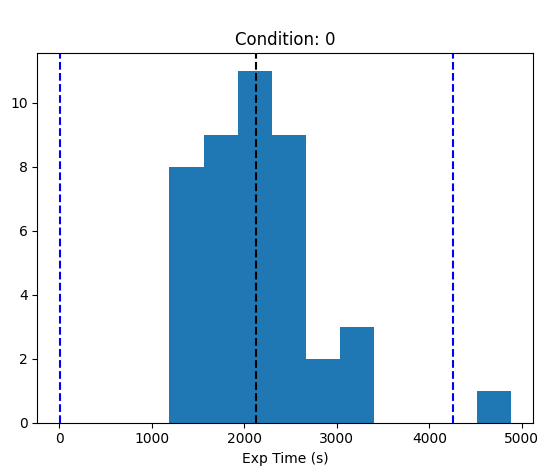

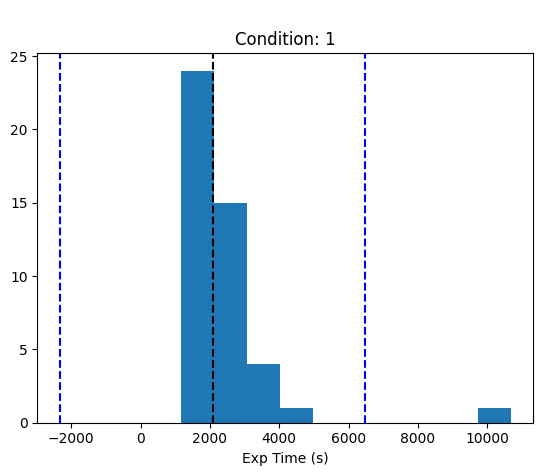

In [48]:
# Time taken per condition

exceeded_parts = []

for condition in [0,1]:
    print("\nCondition: " +str(condition))
    condition_df = complete_data.loc[complete_data.condition == condition]
    clength = condition_df.expLength
    mean = clength.mean()
    sd = clength.std()
    med = clength.median()
    print("Mean: " + str(mean/60))
    print("Std: " + str(sd/60))
    print("Median: " + str(med/60))
    
    time_exceed_df = condition_df.loc[(condition_df.expLength > med + 3*sd) | (condition_df.expLength < med - 3*sd)]
    exceeded_parts += list(time_exceed_df.workerId)
    
    plt.figure()
    plt.hist(clength)
    plt.axvline(med, linestyle='--', color='black')
    plt.axvline(med + 3*sd, linestyle='--', color='blue')
    plt.axvline(med - 3*sd, linestyle='--', color='blue')
    plt.title("\nCondition: " +str(condition))
    plt.xlabel("Exp Time (s)")
    
plt.show()


In [49]:
# Exclude based on time only with full dataset, not with partial dataset
exclude_time = False

In [50]:
# Excluding participants based on time

if exclude_time:
    within_time_parts = complete_data.loc[~complete_data.workerId.isin(exceeded_parts)]
else:
    within_time_parts = complete_data
print(len(within_time_parts.loc[within_time_parts.condition == 0]))
print(len(within_time_parts.loc[within_time_parts.condition == 1]))
print("\n")
for part in exceeded_parts:
    print(part, list(complete_data.loc[complete_data.workerId == part]["condition"])[0])

43
45


611e8f65d14fed0d245c6eb4 0
60e1e24c2cefa1327bb77476 1


In [51]:
if exclude_time:
    for p in exceeded_parts:
        excluded_parts.append({
            "workerId": p,
            "reason": "exceededTime"
        })

In [52]:
# Excluding participants based on effort
ineffortful_parts = within_time_parts.loc[within_time_parts.effort > 1]
ineffortful_parts[["workerId", "condition", "effort"]]


,workerId,condition,effort
99,60e81342fbceb05029e8f5d9,1,2
107,615ecf54890375c5435af634,1,2


In [53]:
effortful_parts = within_time_parts.loc[~within_time_parts.workerId.isin(list(ineffortful_parts.workerId))]
print(len(effortful_parts.loc[effortful_parts.condition == 0]))
print(len(effortful_parts.loc[effortful_parts.condition == 1]))


43
43


In [54]:
for p in ineffortful_parts.workerId:
    excluded_parts.append({
        "workerId": p,
        "reason": "noeffort"
    })

In [55]:
# Excluding participants who already have done the task
for idx, (workerId, ans) in effortful_parts[["workerId","alreadyParticipated"]].iterrows():
    if "no" not in ans.lower() and "never" not in ans.lower():
        print(workerId, ans)

615eb4359e91a19283b519cf yes
5d5193ce23e3ae0001f5f262 This study was new for me.
5fdcda70e44df42e0c260fab I haven't partecipated before on a game like this.
60ebda46268b3e82f52b4dfd First time participating
63d7a79e2606216262545e75 I haven't participated in this game before.
6157671b6ca7514f658ed117  Didn't Play it before. This is the first time to hear or play it.
6136266c04528ef90b95faa5 Yes, but this one seemed different.
61601e9a6b8306196d2a129c This is my very first time participating in a Web of Cash HIT.


In [56]:
# Already participated have to be filtered manually

already_participated_ids = ["615eb4359e91a19283b519cf", "6136266c04528ef90b95faa5"]

already_participated = effortful_parts.loc[effortful_parts.workerId.isin(already_participated_ids)]
already_participated[["workerId", "condition"]]

,workerId,condition
32,615eb4359e91a19283b519cf,1
111,6136266c04528ef90b95faa5,1


In [57]:
for p in already_participated.workerId:
    excluded_parts.append({
        "workerId": p,
        "reason": "alreadyparticipated"
    })

In [58]:
new_parts = effortful_parts.loc[~effortful_parts.workerId.isin(already_participated_ids)]
print(len(new_parts.loc[new_parts.condition == 0]))
print(len(new_parts.loc[new_parts.condition == 1]))

43
41


In [59]:
# Participant data that is complete and that also has valid click strategies 

valid_click_strat_data = new_parts.loc[new_parts.clickStratsValid]
print(len(valid_click_strat_data.loc[valid_click_strat_data.condition == 0]))
print(len(valid_click_strat_data.loc[valid_click_strat_data.condition == 1]))
#print(len(complete_data.loc[complete_data.condition == 2]))
valid_click_strat_data

43
37


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,difficult,firstLevelAns,num_correct_sequences,final_quiz_responses,clickStratsValid,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
1,6137753896c9b6b5813a2432,2023-08-31 12:01:33.467081,2023-08-31 12:35:34.977005,2023-08-31 12:01:43.781823,3,chrome,windows,en-US,2041.0,2031.0,...,I was happy with my performance after I concen...,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-32 to $32', 'Q2':...",True,1300.40,1060.801,-970.199,20680.025,0.0
2,60f815535ea713f564c6ed61,2023-08-31 11:16:47.597716,2023-08-31 11:42:45.597376,2023-08-31 11:17:00.252589,3,chrome,windows,en-GB,1557.0,1545.0,...,Value of viewing the nodes impacted on the amo...,"{'Q0': 'Disagree', 'Q1': 'Agree', 'Q2': 'Neith...",0,"{'Q0': '$-16 to 16', 'Q1': '$-16 to $16', 'Q2'...",True,1453.25,1100.226,-444.774,21478.950,0.0
3,616ed458582d2c3b50149493,2023-08-31 12:05:12.216089,2023-08-31 12:45:28.451606,2023-08-31 12:05:28.770878,3,chrome,windows,en-US,2416.0,2399.0,...,I did not find it difficult to improve.,{},0,"{'Q0': '$-16 to 16', 'Q1': '$-32 to $32', 'Q2'...",True,2326.80,1436.691,-962.309,23728.000,0.0
4,5f9aeb04901ce62720fc6838,2023-08-31 11:23:43.422982,2023-08-31 11:44:20.204400,2023-08-31 11:23:58.458135,3,chrome,windows,en-US,1236.0,1221.0,...,difficult,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,534.80,893.919,-327.081,17270.825,0.0
5,615fdd9674ec001e9d325841,2023-08-31 11:24:07.100923,2023-08-31 11:58:20.061184,2023-08-31 11:25:07.365064,3,chrome,windows,en-US,2052.0,1992.0,...,very difficult. i wanted to stick to old habit...,{},0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,-190.40,1529.891,-462.109,20616.775,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,615f1f19a64adde54a57ba27,2023-08-31 11:23:31.922488,2023-08-31 12:13:40.920493,2023-08-31 11:23:48.040376,3,chrome,windows,en-US,3008.0,2992.0,...,"not that much , I knew along the way.",{},0,"{'Q0': '$-2 to $2', 'Q1': '$-16 to $16', 'Q2':...",True,1932.60,2201.081,-790.919,28876.025,0.0
108,61238fb9d937f53ca982d487,2023-08-31 11:43:00.395959,2023-08-31 12:28:49.818605,2023-08-31 11:43:32.674565,3,chrome,windows,en-US,2749.0,2717.0,...,"very difficult, the inspector wasn't helpful, ...",{},0,"{'Q0': '$-88 to $88', 'Q1': '$-16 to $16', 'Q2...",True,-164.00,1422.927,-1294.073,20267.425,0.0
109,615c64341e181bd34831e9d1,2023-08-31 11:23:03.134418,2023-08-31 12:04:26.639926,2023-08-31 11:23:50.990274,3,chrome,windows,en-US,2483.0,2435.0,...,"It was difficult, because moving to the next n...",{},0,"{'Q0': '$-88 to $88', 'Q1': '$-4 to $4', 'Q2':...",True,-216.00,1846.975,-588.025,19957.825,0.0
112,61601e9a6b8306196d2a129c,2023-08-31 11:27:40.207915,2023-08-31 11:53:29.180985,2023-08-31 11:27:53.079238,3,chrome,windows,en-ZA,1548.0,1536.0,...,"It wasn't difficult, but anxiety caused me to ...",{},0,"{'Q0': '$-88 to $88', 'Q1': '$-16 to $16', 'Q2...",True,1848.40,893.898,-642.102,16737.650,0.0


In [60]:
# Excluding participants

invalid_click_strat_data = new_parts.loc[~new_parts.clickStratsValid]
for p in invalid_click_strat_data.workerId:
    excluded_parts.append({
        "workerId": p,
        "reason": "invalidClickStrats"
    })

In [61]:
# Final score per condition

for condition in [0,1,2]:
    print("\nCondition: " +str(condition))
    clength = new_parts.loc[new_parts.condition == condition].finalScore
    print("Mean: " + str(clength.mean()))
    print("Std: " + str(clength.std()))
    print("Median: " + str(clength.median()))


Condition: 0
Mean: 1223.3023255813953
Std: 895.2692644935622
Median: 1452.8

Condition: 1
Mean: 999.7451219512196
Std: 900.3931137845345
Median: 1142.75

Condition: 2
Mean: nan
Std: nan
Median: nan


In [62]:
# Updating all files of participants whose data should be excluded

for ep in excluded_parts:
    w = ep["workerId"]
    # Get the file name 
    file = [fn for fn in os.listdir(datafolder) if w in fn][0]
    fpath = datafolder + file
    # Read the json
    with open(fpath, 'r') as f:
        participant = json.load(f)
    # Add the fields
    participant["excludeReason"] = ep["reason"]
    # Rewrite the file
    with open(fpath, 'w') as fw:
        json.dump(participant, fw)
    print(f"Wrote to {file}: {ep['reason']}")
    
    

Wrote to full_r_2_614dd477b69221b863e025af.json: dropout
Wrote to full_r_2_5e3421311ddb123e1de9e6ad.json: dropout
Wrote to full_r_2_60cc72425533320442c05f8c.json: dropout
Wrote to full_r_2_6130815ed54ea2aeb63c7eea.json: dropout
Wrote to full_r_2_613b789d93a4e9a50e6e2c0b.json: dropout
Wrote to full_r_2_617678a3559642b86549849d.json: dropout
Wrote to full_r_2_615164a489588e22d2bd33df.json: dropout
Wrote to full_r_2_614395b646280ec3c4ab1d49.json: quizfail
Wrote to full_r_2_612bef062e4e035e081ba009.json: quizfail
Wrote to full_r_2_6090755b3aebf491674a5e86.json: quizfail
Wrote to full_r_2_6110bd8b78a9ce36185798ab.json: quizfail
Wrote to full_r_2_5ae2280338df95000145500c.json: quizfail
Wrote to full_r_2_60f70af563ef757f65e750e0.json: quizfail
Wrote to full_r_2_5f1f2a911a2f150d3e011bde.json: quizfail
Wrote to full_r_2_611ba9bea0d5bd7db68678e7.json: quizfail
Wrote to full_r_2_61431758d43663d769d89bee.json: quizfail
Wrote to full_r_2_60f6c87c7efc6a4df1230de9.json: quizfail
Wrote to full_r_2_612

In [64]:
sorted(list(new_parts.workerId))

['5b2a72f7c293b90001732b89',
 '5b4e2703995d4e0001093117',
 '5c49d339b43d260001e4dbcb',
 '5c735f3106f23500016d6c97',
 '5c7ceda01d2afc0001f4ad1d',
 '5cbb3393114fa50001ac523f',
 '5d430817d8e9610001825890',
 '5d5193ce23e3ae0001f5f262',
 '5e674adf46fdb74c79935db0',
 '5eb64825c23fbf5300fb5bd9',
 '5ece259aa4ded10009c65c73',
 '5ef0a7a320e4520009b3af18',
 '5f003e622ec97b13f2764ec9',
 '5f033c50099f49505831941b',
 '5f1195fdae9a1601ce9ba2c1',
 '5f78a12acd4a784585c83337',
 '5f9aeb04901ce62720fc6838',
 '5fc00a11268eb941e7d8b066',
 '5fdcda70e44df42e0c260fab',
 '6026bdfaf5361f3d0273bb9c',
 '6033de9dc1a48c0008017a2c',
 '60476abe1e9b3823e4b126d3',
 '605ba57d2842d8291b4afd24',
 '60719da557d8241609b26e83',
 '609f0b539d4cd74841ffb116',
 '60a50457d02bfc23c02d4717',
 '60cd99f1d0df72833ad4346a',
 '60ce464b2601b1bffe9b8ecf',
 '60e0ec03d5f63fb47a3e29b7',
 '60e1e24c2cefa1327bb77476',
 '60e867797bb5194a119f7d60',
 '60ebda46268b3e82f52b4dfd',
 '60ec594ed83f53ef48680356',
 '60ece1f744359d215975d493',
 '60ef2e52a188

# Creating CSV for MCL Toolbox

Converting participant data into a CSV format that is appropriate for reading by mcl_toolbox models

In [88]:
s = "pid,trial_index,action_time,actions,block,path,queries,reward,rt,condition,bonus,score,simulation_mode,state_rewards,time_elapsed,trialTime,trial_type"

for h in s.split(","):
    print("\"{}\",".format(h))

"pid",
"trial_index",
"action_time",
"actions",
"block",
"path",
"queries",
"reward",
"rt",
"condition",
"bonus",
"score",
"simulation_mode",
"state_rewards",
"time_elapsed",
"trialTime",
"trial_type",


In [89]:
header_row = [
    "pid",
    "trial_index",
    "action_time",
    "actions",
    "block",
    "path",
    "queries",
    "reward",
    "rt",
    "condition",
    "bonus",
    "score",
    "simulation_mode",
    "state_rewards",
    "time_elapsed",
    "trialTime",
    "trial_type",
    "reward_withheld"
]


In [90]:
scarce_complete = complete_data[complete_data.condition == 1]
control_complete = complete_data[complete_data.condition == 0]


control_csv_rows = [header_row]
scarce_csv_rows = [header_row]

# Create a CSV table with all the trials as rows
for workerId in complete_data.workerId:
    # Read data as was present in PostGRES output
    # Part_data object created at very beginning of this notebook
    participant = part_data[workerId]
    trial_count = 1
    click_cost = participant["condition"] * 0.25 + (1 - participant["condition"])
    for idx, data_point in enumerate(participant["data"]):
        trialdata = data_point["trialdata"]
        if trialdata["trial_type"] == "mouselab-mdp" and trialdata["trial_id"].startswith("mdp_"):
            if trial_count > 40: 
                print(workerId)
                continue
            num_clicks = len(trialdata["queries"]["click"]["state"]["target"])
            new_row = [
                workerId,
                trial_count,
                trialdata["actionTimes"],
                trialdata["actions"],
                "begin" if trial_count <= 10 else "test",
                trialdata["path"],
                trialdata["queries"],
                trialdata["rewards"],
                trialdata["rt"],
                participant["condition"],
                0,
                trialdata["score"],
                [None] * 3,
                trialdata["stateRewards"],
                trialdata["time_elapsed"],
                trialdata["trialTime"],
                trialdata["trial_type"],
                trialdata["withholdReward"]
            ]
            trial_count += 1
            # print(click_cost, num_clicks, trialdata["score"], new_row[11], new_row[-1])
            if participant["condition"] == 0:
                control_csv_rows.append(new_row)
            else:
                scarce_csv_rows.append(new_row)
    
    

64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1
64835cdc41f91285bcbd2de1


In [81]:
# Write to CSV file

with open('../results/mouselab-mdp-final-misaligned.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for row in scarce_csv_rows:
        writer.writerow(row)


In [91]:
# Write to CSV file

with open('../results/mouselab-mdp-final-control.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for row in control_csv_rows:
        writer.writerow(row)


In [8]:
# Creating CSV for optimal strategy to infer sequences

optimalpicklename = "../results/1.0_clicks_high_increasing_.pickle"

with open(optimalpicklename, 'rb') as file:
    optimal_clicks = pickle.load(file)
    
opt_csv_rows = [header_row]

trial_count = 1

for trial in optimal_clicks["optimal"]:
    trial_rewards = [trial["stateRewards"][int(c)] for c in trial["clicks"][:-1]]
    new_row = [
        "dynamic_program",
        trial_count,
        [],
        [],
        "begin" if trial_count <= 10 else "test",
        [],
        { 
            "click" : { 
                "state" : {
                    "target" : trial["clicks"][:-1],
                    "times" : list(range(len(trial["clicks"][:-1])))
                }
            }
        },
        trial_rewards,
        [3] * len(trial["clicks"][:-1]),
        0,
        0,
        0,
        [None] * 3,
        trial["stateRewards"],
        None,
        None,
        "mouselab-mdp"

    ]
    trial_count += 1
    opt_csv_rows.append(new_row)
    if trial_count == 31: 
        break

In [9]:
# Write to CSV file

with open('../results/mouselab-mdp-final-dp.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for row in opt_csv_rows:
        writer.writerow(row)


## Feedback and Demographics

In [69]:
len(complete_data)

88

In [70]:
# Feedback comments

for part in part_stats_dicts:
    printed = False
    if len(part["feedback"]) > 0:
        print("Feedback: " + part["feedback"])
        printed = True
    if len(part["alreadyParticipated"]) > 0:
        print("Already participated: " + part["alreadyParticipated"])
        printed = True
    if len(part["comments"]) > 0:
        print("Comments: " + part["comments"])
        printed = True
    if printed:
        print("\n")

Feedback: Nothing was confusing or hard to understand
Already participated: I did not
Comments: The experiment ran smoothly


Feedback: No, the instructions were clear and so was the game.
Already participated: No, it was my first time doing this kind of game, hope to get more soon.
Comments: Can I please receive more games like this, I really enjoyed playing it.


Feedback: no
Already participated: no


Feedback: no i understood ok
Already participated: no i have not done this before
Comments: enjoyable task :)


Feedback: Not particularly, it was fun.
Already participated: I haven't participated in this game before.
Comments: Thank you for letting me participate. 


Feedback: No
Already participated: No, I have not participated before
Comments: N/A


Feedback: NO
Already participated: No I have never participated in Web of Cash HIT before
Comments: I enjoyed the game but was a little bit tricky at first


Feedback: No
Already participated: No
Comments: None


Feedback: no. the instru

In [71]:
# Demographics:

which_df = new_parts

conditions = {
    0: "Control",
    1: "Misaligned"
}

ages = {
    "all" : which_df["age"].astype("int")
}

num_male = {
    
}
num_female = {
    
}
num_other = {
    
}
gender_unique, gender_counts = np.unique(which_df.gender, return_counts=True)
genders = np.asarray((gender_unique, gender_counts)).T
num_male["all"] = genders[np.where(genders[:,0] == "male")[0][0], 1]
num_female["all"] = genders[np.where(genders[:,0] == "female")[0][0], 1]

try:
    num_other["all"] = genders[np.where(genders[:,0] == "other")[0][0], 1]
except:
    num_other["all"] = 0

for cond in conditions.keys():
    sub_df = which_df.loc[which_df.condition == cond]
    ages[cond] = sub_df["age"].astype("int")
    gender_unique, gender_counts = np.unique(sub_df.gender, return_counts=True)
    genders = np.asarray((gender_unique, gender_counts)).T
    num_male[cond] = genders[np.where(genders[:,0] == "male")[0][0], 1]
    num_female[cond] = genders[np.where(genders[:,0] == "female")[0][0], 1]
    try:
        num_other[cond] = genders[np.where(genders[:,0] == "other")[0][0], 1]
    except:
        num_other[cond] = 0


efforts = which_df["effort"].astype("int")
colorblind_unique, colorblind_counts = np.unique(which_df.colorblind, return_counts=True)
colorblinds = np.asarray((colorblind_unique, colorblind_counts)).T

print("Age stats:")
print("\tOverall:")
print("\t\tMean: {0:0.3f}".format(ages["all"].mean()))
print("\t\tSD: {0:0.3f}".format(ages["all"].std()))
print("\t\tMedian: {0:0.3f}".format(ages["all"].median()))
print("\t\tMax: {0:0.3f}".format(ages["all"].max()))
print("\t\tMin: {0:0.3f}".format(ages["all"].min()))
for cond, condname in conditions.items():
    sub_df = which_df.loc[which_df.condition == cond]
    print(f"\t{condname}:")
    print("\t\tMean: {0:0.3f}".format(ages[cond].mean()))
    print("\t\tSD: {0:0.3f}".format(ages[cond].std()))
    print("\t\tMedian: {0:0.3f}".format(ages[cond].median()))
    print("\t\tMax: {0:0.3f}".format(ages[cond].max()))
    print("\t\tMin: {0:0.3f}".format(ages[cond].min()))

print("Gender stats:")
print("\tOverall:")
print("\t\tMale: {0} ({1:0.2f}%)".format(num_male["all"], (100 * num_male["all"] / len(which_df))))
print("\t\tFemale: {0} ({1:0.2f}%)".format(num_female["all"], (100 * num_female["all"] / len(which_df))))
print("\t\tOther: {0} ({1:0.2f}%)".format(num_other["all"], (100 * num_other["all"] / len(which_df))))
for cond, condname in conditions.items():
    sub_df = which_df.loc[which_df.condition == cond]
    print(f"\t{condname}:")
    print("\t\tMale: {0} ({1:0.2f}%)".format(num_male[cond], (100 * num_male[cond] / len(sub_df))))
    print("\t\tFemale: {0} ({1:0.2f}%)".format(num_female[cond], (100 * num_female[cond] / len(sub_df))))
    print("\t\tOther: {0} ({1:0.2f}%)".format(num_other[cond], (100 * num_other[cond] / len(sub_df))))


Age stats:
	Overall:
		Mean: 29.786
		SD: 9.517
		Median: 28.000
		Max: 60.000
		Min: -1.000
	Control:
		Mean: 28.674
		SD: 7.580
		Median: 27.000
		Max: 56.000
		Min: 19.000
	Misaligned:
		Mean: 30.951
		SD: 11.176
		Median: 29.000
		Max: 60.000
		Min: -1.000
Gender stats:
	Overall:
		Male: 30 (35.71%)
		Female: 54 (64.29%)
		Other: 0 (0.00%)
	Control:
		Male: 14 (32.56%)
		Female: 29 (67.44%)
		Other: 0 (0.00%)
	Misaligned:
		Male: 16 (39.02%)
		Female: 25 (60.98%)
		Other: 0 (0.00%)


In [72]:
# Effort:

which_df = new_parts

conditions = {
    0: "Control",
    1: "Misaligned"
}


for cond in conditions.keys():
    sub_df = which_df.loc[which_df.condition == cond]
    print("\n" + conditions[cond])
    print(sub_df["effort"].value_counts())




Control
effort
0    39
1     4
Name: count, dtype: int64

Misaligned
effort
0    32
1     9
Name: count, dtype: int64


In [73]:
# Comments on difficulty and strategy - all conditions

for cond, condname in conditions.items():
    print(f"\n------ {condname} ------\n")
    for part in part_stats_dicts:
        if part['condition'] != cond: continue
        printed = False
        if len(part["whatStrategy"]) > 0:
            print("Strategy Used: " + part["whatStrategy"])
            printed = True
        if len(part["strategyImprove"]) > 0:
            print("How strategy was improved: " + part["strategyImprove"])
            printed = True
        if len(part["difficult"]) > 0:
            print("Difficulty: " + part["difficult"])
            printed = True
        if printed:
            print("\n")


------ Control ------

Strategy Used: When clicking a node if it had a value of 30 0r more I would head for that on most occasions but would sometimes deviate from this.
How strategy was improved: Yes took more notice of amounts as game progressed.
Difficulty: Because numbers seemed a bit random felt a bit of a guessing game at times.


Strategy Used: I found which end nodes had the highest value and then went towards them
How strategy was improved: At first i struggled guessing randomly but then realised the best option was to find the highest end nodes
Difficulty: it was diffuclt to begin but once i got to grips with the task better i found it easier


Strategy Used: I used the nodes inspector on the nodes which I thought would be my end target to see if I was satisfied with the amount, if it was a decent credit I would head to that node.  I tried to see the value of few a nodes as possible to save the expense
How strategy was improved: I'm not sure I did, if at all only by using th

In [81]:
# Stats on self-report of clicks at first level - all conditions

questions = {
    "Q0": "In most rounds, I clicked the nodes at the first level.",
    "Q1": "When ..., it was ONLY to receive the immediate $0.25 reward.",
    "Q2": "When ..., it was NOT ONLY to receive the immediate $0.25 reward.",
    "Q3": "When ..., I did it to see the numbers that were present at those nodes.",
    "Q4": "When ..., I did for another reason than to see the numbers that were present at those nodes.",
    "Q5": "When ..., I paid attention to the numbers that were present at those nodes.",
    "Q6": "When ..., I did NOT pay attention to the numbers that were present at those nodes."
}

longest_q_len = max([len(a) for a in questions.values()])

df_dicts = []

# Pad answers with spaces
for q in questions.keys():
    qtext = questions[q]
    questions[q] += "".join([" "] * (longest_q_len - len(qtext)))

answers = ["Strongly disagree", "Disagree", "Neither disagree nor agree", "Agree", "Strongly agree"]
answer_abbr_map = {a: ''.join([w[0] for w in a.split(" ")]).upper() for a in answers}

for cond, condname in conditions.items():
    print(f"\n------ {condname} ------\n")
    for part in part_stats_dicts:
        if part['condition'] != cond: continue
        if part['workerId'] not in list(complete_data.workerId): continue
        printed = False
        prop_L1clicks = sum([bool(c) for c in part["clicksL1"]])/len(part["clicksL1"])
        if prop_L1clicks < 0.1: continue
        print("\n", part["workerId"], part["clickStratsValid"], prop_L1clicks)
        for qnum, ans in part["firstLevelAns"].items():
            print(questions[qnum], "\t", answer_abbr_map[ans])#answers.index(ans))
        dict_ = {k: answers.index(v) for (k,v) in part["firstLevelAns"].items()}
        dict_["cL1_mean"] = np.mean(part["clicksL1"])
        df_dicts.append(dict_)
        printed = True
        if printed:
            print("\n")
            
strategy_ans_df = pd.DataFrame.from_dict(df_dicts).dropna()


------ Control ------


 63f787256fc87f0a297a849c True 0.125



 6137753896c9b6b5813a2432 True 0.1



 5b4e2703995d4e0001093117 True 0.35



 5eb64825c23fbf5300fb5bd9 True 0.3



 616ed458582d2c3b50149493 True 0.125



 5fc00a11268eb941e7d8b066 True 0.125



 6113d1d02fbd58ed15b3c8e0 True 0.775



 6122ba6ef91f0ace90542531 True 0.125



 6103b1577404ce2e3e20ceb1 True 0.2



 616ab139038c7029d826e63b True 0.15



 60fd2fe06849943770465f94 True 0.125



 5f1195fdae9a1601ce9ba2c1 True 0.15



 611d3e4fb9e2cb38be842d00 True 0.175



 60fb1cab39fd626cb9dc093b True 0.7



 611cbdc447871199a422d10f True 0.125



 615f4ddc420b1b75f246a4ec True 0.1



 615f1f19a64adde54a57ba27 True 0.15



 5f003e622ec97b13f2764ec9 True 0.725



 60ebda46268b3e82f52b4dfd True 0.45



 6131023dd3d448c3c1102d67 True 0.225



 615fdd9674ec001e9d325841 True 0.15



 60719da557d8241609b26e83 True 0.425



 6153554048e1825ac1946e84 True 0.425



 6157671b6ca7514f658ed117 True 0.3



 60a50457d02bfc23c02d4717 True 0.

0.42776839794048493


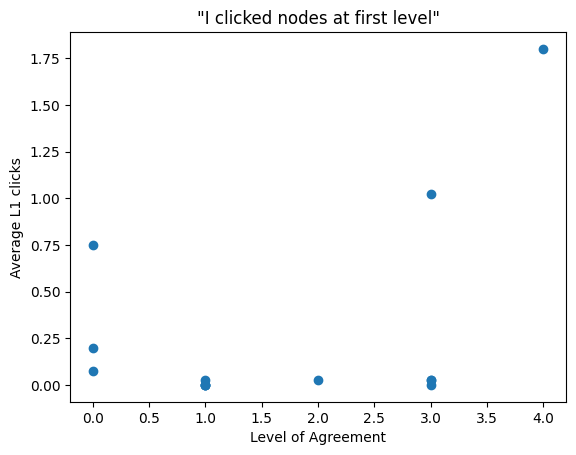

In [61]:
print(strategy_ans_df["Q0"].corr(strategy_ans_df["cL1_mean"]))
plt.scatter(strategy_ans_df["Q0"], strategy_ans_df["cL1_mean"])
plt.title("\"I clicked nodes at first level\"")
plt.xlabel("Level of Agreement")
plt.ylabel("Average L1 clicks")
plt.show()

In [113]:
strategy_ans_df["Q4"].value_counts().sort_index()

Q4
0.0    5
1.0    4
2.0    3
4.0    2
Name: count, dtype: int64

In [156]:
strategy_ans_df.where(strategy_ans_df > 2, 100)

,Q0,Q1,Q2,Q3,Q4,cL1_mean
0,3.0,100.0,100.0,100.0,3.0,100.00
1,3.0,100.0,3.0,100.0,3.0,100.00
2,100.0,100.0,3.0,100.0,100.0,100.00
3,4.0,100.0,4.0,4.0,100.0,100.00
4,3.0,100.0,100.0,3.0,100.0,100.00
5,3.0,100.0,100.0,3.0,100.0,100.00
6,100.0,100.0,100.0,100.0,100.0,100.00
8,4.0,100.0,3.0,100.0,3.0,100.00
9,100.0,3.0,100.0,4.0,4.0,100.00
10,100.0,100.0,100.0,3.0,100.0,100.00


In [165]:
agreement_df == 2

,Q0,Q1,Q2,Q3,Q4,cL1_mean
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False
6,False,False,False,False,False,False
8,False,True,False,False,False,False
9,False,False,False,False,False,False
10,False,False,False,False,False,False


In [172]:
agreement_df = strategy_ans_df.copy()
agreement_df = agreement_df.where(agreement_df >= 2, -1)
agreement_df = agreement_df.where(agreement_df <= 2, 1)
agreement_df = agreement_df.where(agreement_df != 2, 0)
agreement_df["cL1_mean"] = strategy_ans_df["cL1_mean"]

agreement_df

,Q0,Q1,Q2,Q3,Q4,cL1_mean
0,1.0,-1.0,-1.0,-1.0,1.0,0.12
1,1.0,-1.0,1.0,-1.0,1.0,0.36
2,-1.0,-1.0,1.0,-1.0,0.0,0.04
3,1.0,-1.0,1.0,1.0,-1.0,1.96
4,1.0,-1.0,-1.0,1.0,-1.0,0.00
5,1.0,-1.0,-1.0,1.0,0.0,0.60
6,-1.0,-1.0,-1.0,-1.0,-1.0,0.00
8,1.0,0.0,1.0,-1.0,1.0,0.00
9,-1.0,1.0,-1.0,1.0,1.0,0.28
10,-1.0,-1.0,-1.0,1.0,-1.0,0.00


In [176]:
(agreement_df["Q1"] + agreement_df["Q2"]).value_counts()

 0.0    13
-2.0    10
-1.0     4
 1.0     2
Name: count, dtype: int64

In [85]:
correct_answers = {
    "Q0": "$-2 to $2",
    "Q1": "$-16 to $16",
    "Q2": "$-88 to $88"
}

num_correct = {}
questions_correct = {}
bonus = {}

for cond in conditions.keys():
    num_correct[cond] = []
    questions_correct[cond] = {
        "Q0": 0,
        "Q1": 0,
        "Q2": 0
    }
    bonus[cond] = []
    sub_df = complete_data.loc[complete_data.condition == cond]
    for idx, row in sub_df.iterrows():
        part = [p for p in part_stats_dicts if p["workerId"] == row["workerId"]][0]
        part_answers = part['final_quiz_responses']
        part_correct_answers = sum([part_answers[key] == correct_answers[key] for key in correct_answers.keys()])
        num_correct[cond].append(part_correct_answers)
        for q in correct_answers.keys():
            questions_correct[cond][q] += int(part_answers[q] == correct_answers[q])
        part_bonus = full_bonus_eligible.loc[full_bonus_eligible.workerId == row["workerId"]].bonus.values[0]
        bonus[cond].append(part_bonus)



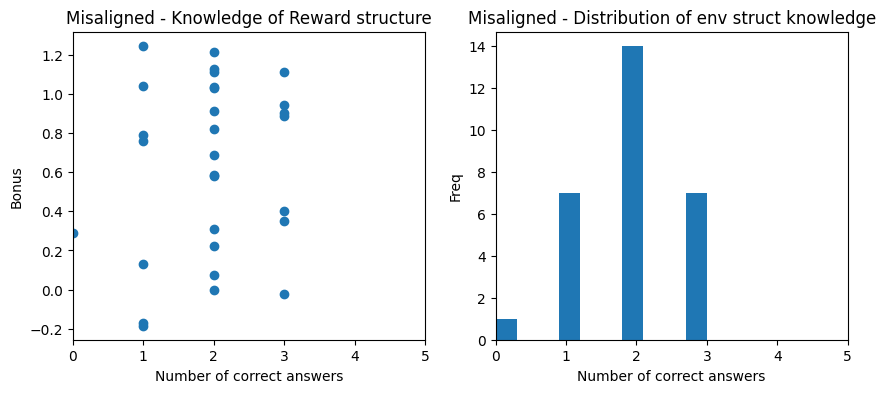

In [86]:


for idx, (cond, condname) in enumerate(conditions.items()):
    plt.figure(figsize=(5 * 2,4 * len(conditions)))
    plt.subplot(1,2,1)
    plt.scatter(num_correct[cond], bonus[cond])
    plt.xlabel("Number of correct answers")
    plt.ylabel("Bonus")
    plt.title(f"{condname} - Knowledge of Reward structure")
    plt.xlim([0,5])
    plt.subplot(1,2,2)
    plt.hist(num_correct[cond])
    plt.xlabel("Number of correct answers")
    plt.ylabel("Freq")
    plt.xlim([0,5])
    plt.title(f"{condname} - Distribution of env struct knowledge")

plt.show()

In [87]:
questions_correct

{0: {'Q0': 20, 'Q1': 13, 'Q2': 23}}